In [104]:
# @title Extracting and Reading Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/Raw_Data/'

cpi = pd.read_csv(path + 'CPIAUCSL.csv', parse_dates=['observation_date'], index_col='observation_date')
fed = pd.read_csv(path + 'FEDFUNDS.csv', parse_dates=['observation_date'], index_col='observation_date')
wages = pd.read_csv(path + 'CES0500000003.csv', parse_dates=['observation_date'], index_col='observation_date')
unemployment = pd.read_csv(path + 'UNRATE.csv', parse_dates=['observation_date'], index_col='observation_date')
savings = pd.read_csv(path + 'PSAVERT.csv', parse_dates=['observation_date'], index_col='observation_date')
pce = pd.read_csv(path + 'PCE.csv', parse_dates=['observation_date'], index_col='observation_date')
investment = pd.read_csv(path + 'GPDI.csv', parse_dates=['observation_date'], index_col='observation_date')
gdp = pd.read_csv(path + 'GDP.csv', parse_dates=['observation_date'], index_col='observation_date')

cpi.columns = ['CPI']
fed.columns = ['Federal Funds Rate']
wages.columns = ['Average Hourly Earnings']
unemployment.columns = ['Unemployment ']
savings.columns = ['Personal Savings Rate']
pce.columns = ['PCE']
investment.columns = ['GPDI']
gdp.columns = ['GDP']

df = cpi.join([fed, wages, unemployment, savings, pce, investment, gdp])
df.dropna(inplace=True)

print(df.head())


                      CPI  Federal Funds Rate  Average Hourly Earnings  \
observation_date                                                         
2006-04-01        200.700                4.79                    20.15   
2006-07-01        202.900                5.24                    20.29   
2006-10-01        201.900                5.25                    20.42   
2007-01-01        203.437                5.25                    20.59   
2007-04-01        205.904                5.25                    20.77   

                  Unemployment   Personal Savings Rate     PCE      GPDI  \
observation_date                                                           
2006-04-01                  4.7                    3.1  9191.6  2709.252   
2006-07-01                  4.7                    2.3  9343.8  2709.420   
2006-10-01                  4.4                    2.4  9393.6  2675.406   
2007-01-01                  4.6                    2.4  9538.7  2664.295   
2007-04-01               

**Note on Shaded Regions:**

Red and purple shaded areas represent U.S. recession periods:
- 🔴 December 2007 – June 2009 (Global Financial Crisis)
- 🟣 February 2020 – April 2020 (COVID-19 Recession)

These are visual markers to help interpret shifts in the macroeconomic indicators.

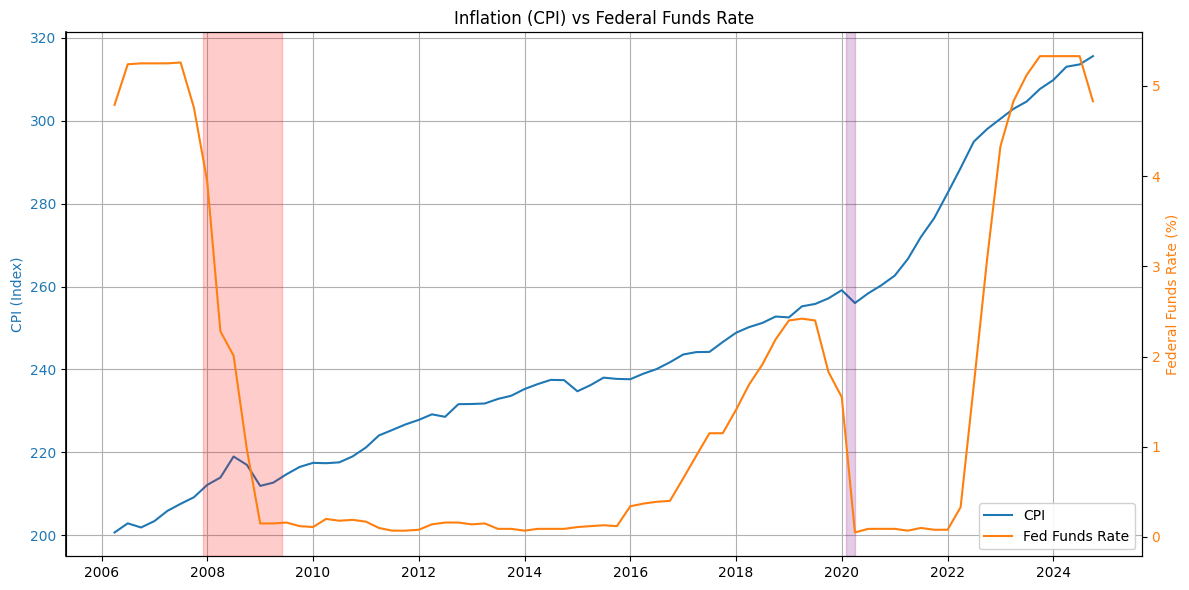

In [92]:
# @title Inflation (CPI) vs Federal Funds Rate
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_title('Inflation (CPI) vs Federal Funds Rate')
ax1.set_ylabel('CPI (Index)', color='tab:blue')
line1 = ax1.plot(df.index, df['CPI'], color='tab:blue', label='CPI')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('Federal Funds Rate (%)', color='tab:orange')
line2 = ax2.plot(df.index, df['Federal Funds Rate'], color='tab:orange', label='Fed Funds Rate')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.axvspan(pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-01'), color='red', alpha=0.2)
plt.axvspan(pd.to_datetime('2020-02-01'), pd.to_datetime('2020-04-01'), color='purple', alpha=0.2)

ax1.spines['left'].set_edgecolor('black')
ax1.spines['left'].set_linewidth(1.2)

lines, labels = line1 + line2, ['CPI', 'Fed Funds Rate']
ax1.legend(lines, labels, loc='lower right', framealpha=0.9, facecolor='white')


fig.tight_layout()
plt.show()

**Inflation (CPI) vs Federal Funds Rate**

This chart shows the relationship between the U.S. inflation index (CPI) and the Federal Funds Rate over time. Notably, interest rates remained low following the 2008 recession, with sharp increases starting in 2022 in response to rising inflation.


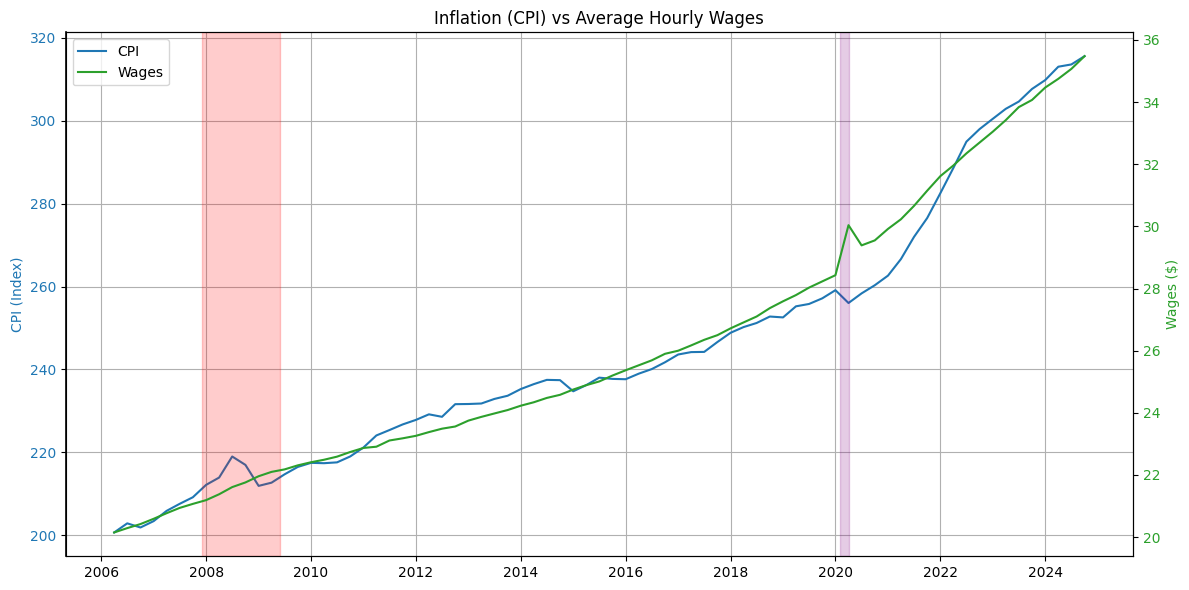

In [93]:
# @title Inflation (CPI) vs Average Hourly Wages
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_title('Inflation (CPI) vs Average Hourly Wages')
ax1.set_ylabel('CPI (Index)', color='tab:blue')
line1 = ax1.plot(df.index, df['CPI'], color='tab:blue', label='CPI')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('Wages ($)', color='tab:green')
line2 = ax2.plot(df.index, df['Average Hourly Earnings'], color='tab:green', label='Wages')
ax2.tick_params(axis='y', labelcolor='tab:green')

plt.axvspan(pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-01'), color='red', alpha=0.2)
plt.axvspan(pd.to_datetime('2020-02-01'), pd.to_datetime('2020-04-01'), color='purple', alpha=0.2)

ax1.spines['left'].set_edgecolor('black')
ax1.spines['left'].set_linewidth(1.2)

lines, labels = line1 + line2, ['CPI', 'Wages']
ax1.legend(lines, labels, loc='upper left')

fig.tight_layout()
plt.show()


**Inflation (CPI) vs Average Hourly Wages**

While both CPI and wages show upward trends, wages increased more slowly than inflation during 2021–2023, suggesting reduced real income growth.


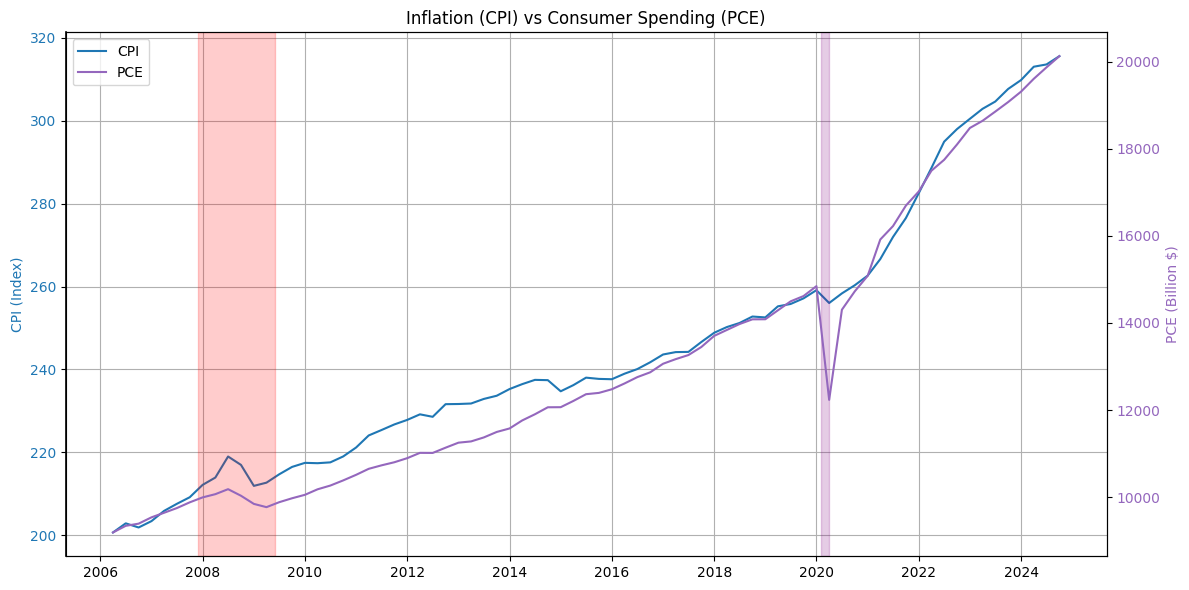

In [94]:
# @title Inflation (CPI) vs Consumer Spending (PCE)
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.set_title('Inflation (CPI) vs Consumer Spending (PCE)')
ax1.set_ylabel('CPI (Index)', color='tab:blue')
line1 = ax1.plot(df.index, df['CPI'], color='tab:blue', label='CPI')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('PCE (Billion $)', color='tab:purple')
line2 = ax2.plot(df.index, df['PCE'], color='tab:purple', label='PCE')
ax2.tick_params(axis='y', labelcolor='tab:purple')

plt.axvspan(pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-01'), color='red', alpha=0.2)
plt.axvspan(pd.to_datetime('2020-02-01'), pd.to_datetime('2020-04-01'), color='purple', alpha=0.2)

ax1.spines['left'].set_edgecolor('black')
ax1.spines['left'].set_linewidth(1.2)

lines, labels = line1 + line2, ['CPI', 'PCE']
ax1.legend(lines, labels, loc='upper left')

fig.tight_layout()
plt.show()


**Inflation (CPI) vs Consumer Spending (PCE)**

Consumer spending continued to rise alongside inflation, with a brief dip during COVID-19. The shaded regions indicate recession periods.


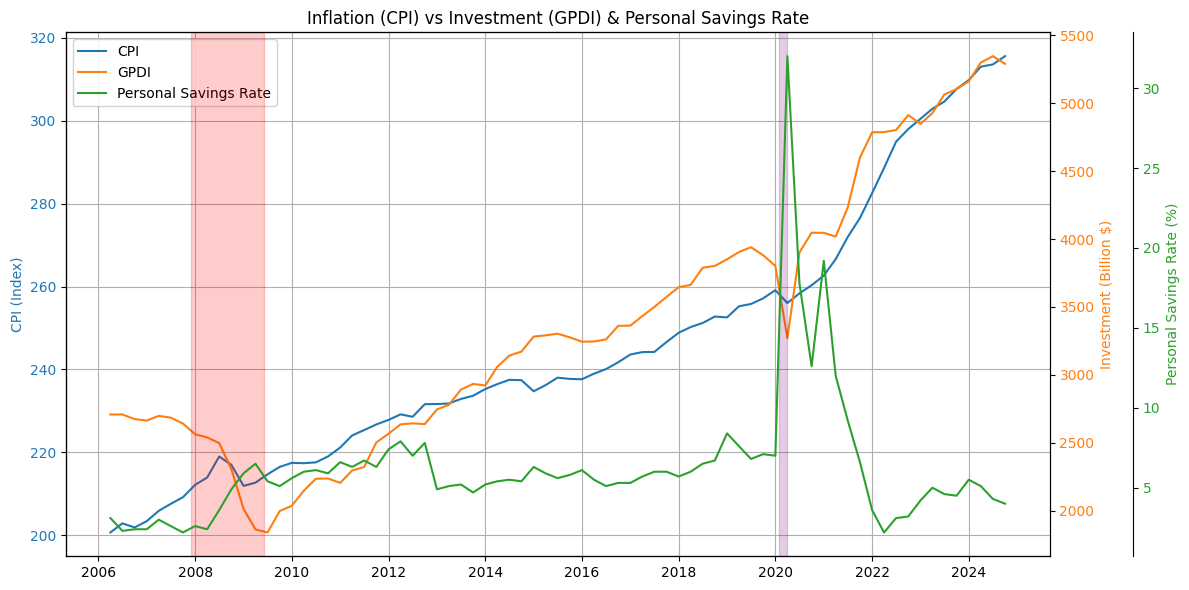

In [105]:
# @title Inflation (CPI) vs Investment (GPDI) & Personal Savings Rate
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_title('Inflation (CPI) vs Investment (GPDI) & Personal Savings Rate')
ax1.set_ylabel('CPI (Index)', color='tab:blue')
ax1.plot(df.index, df['CPI'], color='tab:blue', label='CPI')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('Investment (Billion $)', color='tab:orange')
ax2.plot(df.index, df['GPDI'], color='tab:orange', label='GPDI')
ax2.tick_params(axis='y', labelcolor='tab:orange')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(("outward", 60))
ax3.set_ylabel('Personal Savings Rate (%)', color='tab:green')
ax3.plot(df.index, df['Personal Savings Rate'], color='tab:green', label='Personal Savings Rate')
ax3.tick_params(axis='y', labelcolor='tab:green')

plt.axvspan(pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-01'), color='red', alpha=0.2, label='2008 Recession')
plt.axvspan(pd.to_datetime('2020-02-01'), pd.to_datetime('2020-04-01'), color='purple', alpha=0.2, label='COVID Recession')

lines_all = ax1.get_lines() + ax2.get_lines() + ax3.get_lines()
labels_all = [line.get_label() for line in lines_all]

filtered_lines = []
filtered_labels = []

for line, label in zip(lines_all, labels_all):
    if label and not ('Recession' in label or label.startswith('_')):
        filtered_lines.append(line)
        filtered_labels.append(label)

ax1.legend(filtered_lines, filtered_labels, loc='upper left', framealpha=0.9, facecolor='white')


fig.tight_layout()
plt.show()

**Inflation (CPI) vs Investment (GPDI) and Personal Savings Rate**

Investment (orange) dropped during recession periods, especially in 2008 and 2020, while the savings rate (green) spiked briefly during the COVID recession.


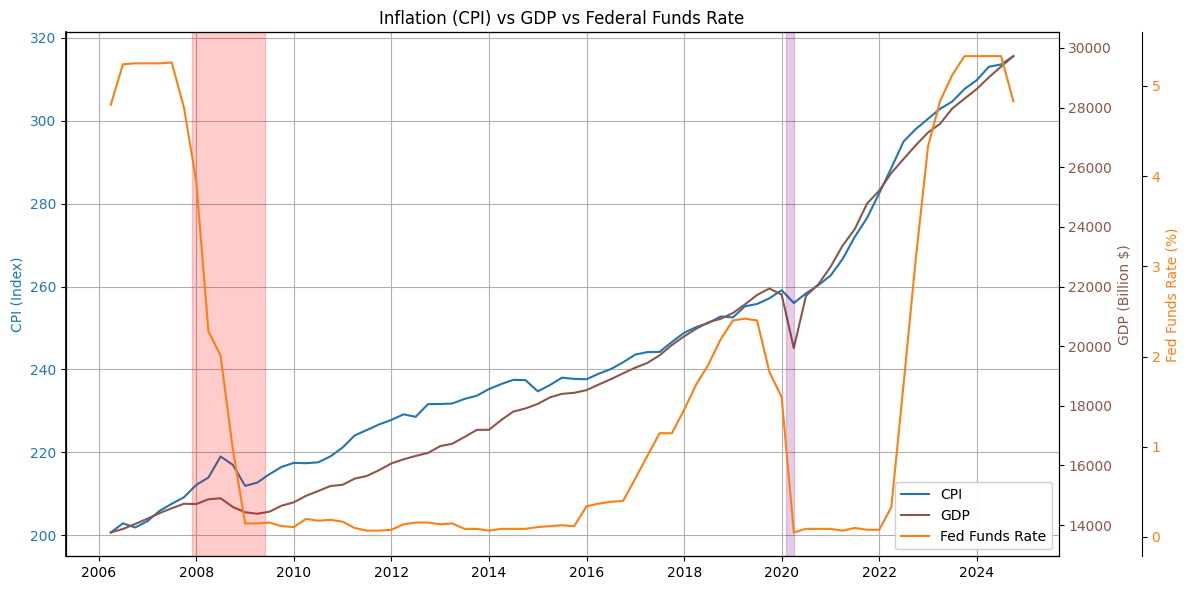

In [97]:
# @title Inflation (CPI) vs GDP vs Federal Funds Rate
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_title('Inflation (CPI) vs GDP vs Federal Funds Rate')
ax1.set_ylabel('CPI (Index)', color='tab:blue')
line1 = ax1.plot(df.index, df['CPI'], color='tab:blue', label='CPI')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True)

ax2 = ax1.twinx()
ax2.set_ylabel('GDP (Billion $)', color='tab:brown')
line2 = ax2.plot(df.index, df['GDP'], color='tab:brown', label='GDP')
ax2.tick_params(axis='y', labelcolor='tab:brown')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(("outward", 60))
ax3.set_ylabel('Fed Funds Rate (%)', color='tab:orange')
line3 = ax3.plot(df.index, df['Federal Funds Rate'], color='tab:orange', label='Fed Funds Rate')
ax3.tick_params(axis='y', labelcolor='tab:orange')

plt.axvspan(pd.to_datetime('2007-12-01'), pd.to_datetime('2009-06-01'), color='red', alpha=0.2)
plt.axvspan(pd.to_datetime('2020-02-01'), pd.to_datetime('2020-04-01'), color='purple', alpha=0.2)

ax1.spines['left'].set_edgecolor('black')
ax1.spines['left'].set_linewidth(1.2)

lines_all = line1 + line2 + line3
labels_all = ['CPI', 'GDP', 'Fed Funds Rate']
ax1.legend(lines_all, labels_all, loc='lower right', framealpha=0.9, facecolor='white')

fig.tight_layout()
plt.show()


**Inflation (CPI) vs GDP vs Federal Funds Rate**

This macro-level overview shows how GDP and inflation rise together in the long run, while interest rates are adjusted cyclically by the Fed to manage inflation.


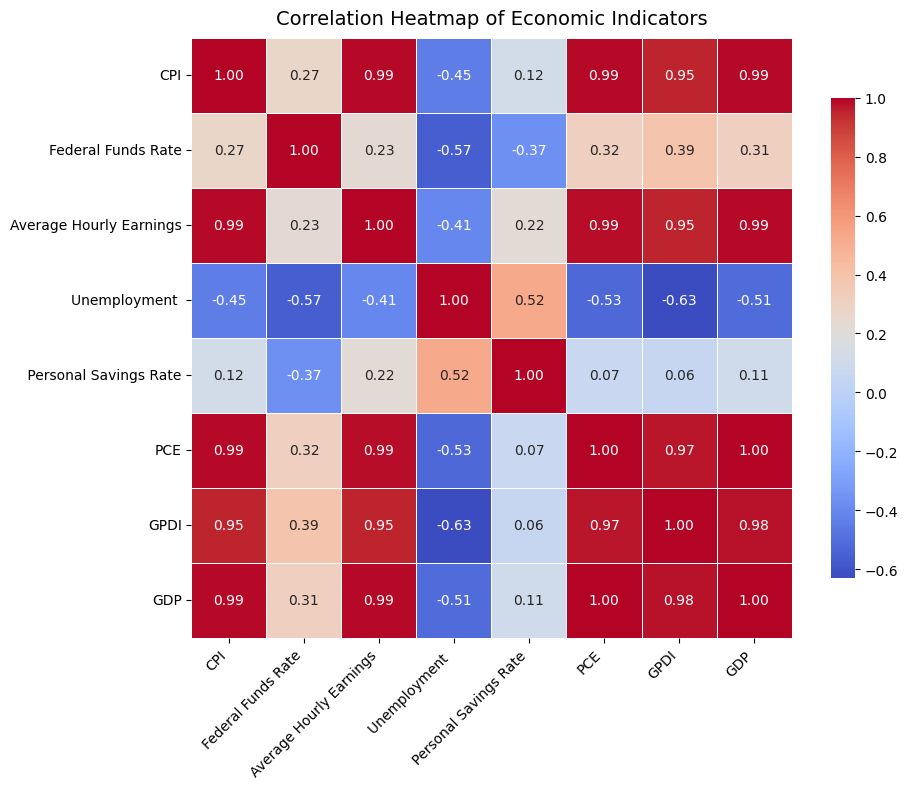

In [98]:
# @title Heatmap of all Factors
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))

sns.heatmap(
    df.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8}
)

plt.title("Correlation Heatmap of Economic Indicators", fontsize=14, pad=10)
plt.xticks(rotation=45, ha='right')  # rotate with right alignment
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Correlation Heatmap of Economic Indicators**

This heatmap shows the pairwise correlation between key U.S. macroeconomic variables from 2006 to 2025. Strong positive correlations are observed between GDP, CPI, investment (GPDI), and consumer spending (PCE), indicating synchronized economic expansion during growth periods. Wages also show a strong positive correlation with inflation, suggesting nominal income rises alongside prices. As expected, unemployment has a negative correlation with most growth indicators. These relationships reflect typical macroeconomic dynamics during inflationary and recessionary periods.
